<a href="https://colab.research.google.com/github/kodiakpony/datakit-housing-fall-2024/blob/main/challenge-3/DataKindHousingChallengeColab-direct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2,venn2_circles,venn3, venn3_circles
import seaborn as sns
import zipfile
import requests, io


Some useful references for python zip file csv reading:

https://docs.python.org/3/library/zipfile.html

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

https://www.geeksforgeeks.org/with-statement-in-python/


In [ ]:
url = 'https://github.com/datakind/datakit-housing-fall-2024/releases/download/v1.0/housing-data.zip'
filename = "housing-data/FL/data_1-FL.csv"

r = requests.get(url)

with zipfile.ZipFile(io.BytesIO(r.content)) as myzip:
    with myzip.open(filename) as myfile:
        df = pd.read_csv(myfile)
df

,geoid,geoid_year,state,county,state_fips_code,county_fips_code,b19083_001e,b19083_001m,economic_distress_pop_agg,economic_distress_simple_agg,...,num_mortgage_originated,number_of_sba504_loans,number_of_sba7a_loans,qct,s2503_c01_024e,s2503_c01_024m,s2503_c03_024e,s2503_c03_024m,s2503_c05_024e,s2503_c05_024m
0,12001000400,2020,12,1,12,1,0.3928,0.0724,YES,YES,...,117.0,5.0,5.0,0,961,110,909,67,1297,405
1,12001000806,2020,12,1,12,1,0.5466,0.0649,YES,YES,...,6.0,1.0,NaN,1,960,38,-666666666,-222222222,971,43
2,12001000901,2020,12,1,12,1,0.3641,0.0878,YES,YES,...,NaN,NaN,NaN,1,778,21,-666666666,-222222222,776,20
3,12001001203,2020,12,1,12,1,0.3662,0.0894,YES,YES,...,79.0,1.0,NaN,0,1255,177,882,99,1587,95
4,12001001514,2020,12,1,12,1,0.5686,0.0634,YES,YES,...,2.0,1.0,NaN,1,1460,226,733,58,1482,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,12033003506,2020,12,33,12,33,0.4322,0.0543,NO,NO,...,159.0,NaN,NaN,1,1364,214,1448,277,1238,315
1601,12033003800,2020,12,33,12,33,0.4402,0.0756,NO,NO,...,121.0,NaN,NaN,0,911,206,781,252,1073,132
1602,12033003900,2020,12,33,12,33,0.4109,0.0580,NO,NO,...,98.0,NaN,2.0,0,808,179,824,99,622,255
1603,12035060206,2020,12,35,12,35,0.4620,0.0618,YES,YES,...,184.0,13.0,4.0,0,587,119,495,127,974,127


In [ ]:
df2 = pd.concat([
                df.geoid,
                df.county,
                df.opzone,
                df.investment_areas.replace({"YES":1,"NO":0}),
                df.qct,
                df.economic_distress_pop_agg.replace({"YES":1,"NO":0}),
                df.economic_distress_simple_agg.replace({"YES":1,"NO":0})
                ], axis=1)

df2

,geoid,county,opzone,investment_areas,qct,economic_distress_pop_agg,economic_distress_simple_agg
0,12001000400,1,1,1,0,1,1
1,12001000806,1,0,1,1,1,1
2,12001000901,1,0,1,1,1,1
3,12001001203,1,0,1,0,1,1
4,12001001514,1,0,1,1,1,1
...,...,...,...,...,...,...,...
1600,12033003506,33,0,1,1,0,0
1601,12033003800,33,0,0,0,0,0
1602,12033003900,33,0,0,0,0,0
1603,12035060206,35,0,1,0,1,1


In [ ]:
from numpy import sort
# columns that are missing data, sorted by percent missing

from IPython.display import display
with pd.option_context('display.min_rows', 400):
  display(df2.isna().mean().sort_values(ascending=False)*100)

In [ ]:
pd.crosstab(df2.economic_distress_pop_agg,[df2.opzone,df2.qct,df2.investment_areas])

opzone                       0                1           
qct                          0       1        0      1    
investment_areas             0    1  0    1   0   1  0   1
economic_distress_pop_agg                                 
0                          627  367  1   10   1   0  0   0
1                           73  238  1  118  12  83  1  73

In [ ]:
pd.crosstab(df2.economic_distress_pop_agg,df2.investment_areas)

investment_areas,0,1
economic_distress_pop_agg,,
0,629,377
1,87,512


In [ ]:
pd.crosstab(df2.economic_distress_pop_agg,df2.opzone)

opzone,0,1
economic_distress_pop_agg,,
0,1005,1
1,430,169


In [ ]:
pd.crosstab(df2.economic_distress_pop_agg,[df2.qct])

qct,0,1
economic_distress_pop_agg,,
0,995,11
1,406,193


In [ ]:
pd.crosstab(df2.economic_distress_pop_agg,[df2.opzone,df2.qct])

opzone                       0        1    
qct                          0    1   0   1
economic_distress_pop_agg                  
0                          994   11   1   0
1                          311  119  95  74

In [ ]:
pd.crosstab(df2.economic_distress_pop_agg,[df2.opzone,df2.qct]).T.sum()


,0
economic_distress_pop_agg,
0,1006
1,599


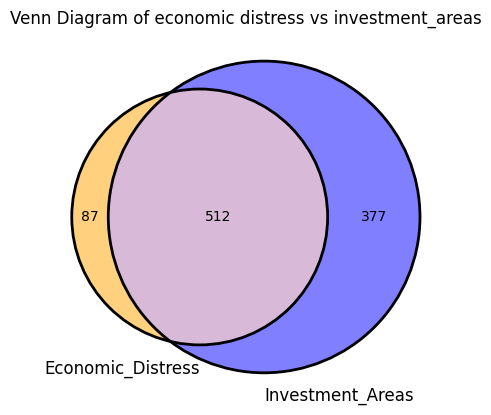

In [ ]:
ctf=pd.crosstab(df2.economic_distress_pop_agg,df2.investment_areas)
# depict venn diagram
subsets = (ctf[0][1], ctf[1][0], ctf[1][1])
venn2(subsets,
      set_labels = ('Economic_Distress',
                    'Investment_Areas'),
      set_colors=("orange",
                  "blue"),alpha=0.5)

# add outline
venn2_circles(subsets)
# assign title of the venn diagram
plt.title("Venn Diagram of economic distress vs investment_areas")
plt.show()


Useful resource for plotting Venn diagrams:
https://www.geeksforgeeks.org/how-to-create-and-customize-venn-diagrams-in-python/#

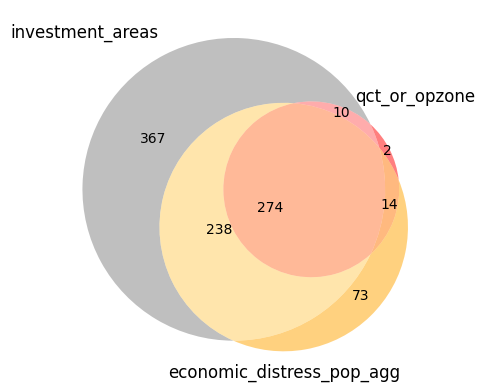

In [ ]:
# create venn diagram without crosstab

setI=set(df2[df2.investment_areas==1].geoid.values)
setEP=set(df2[df2.economic_distress_pop_agg==1].geoid.values)
setES=set(df2[df2.economic_distress_simple_agg==1].geoid.values)

setQ=set(df2[df2.qct==1].geoid.values)
setOP=set(df2[df2.opzone==1].geoid.values)
#venn2((set1, set2), ('investment_areas', 'economic_distress_pop_agg'),set_colors=("blue",
#                  "orange"),alpha=0.5)
#venn3((setI, setEP, setES), ('investment_areas', 'economic_distress_pop_agg','economic_distress_simple_agg'),set_colors=("blue",
#                  "orange","red"),alpha=0.5)
#venn3((setI,setQ,setOP),('investment_areas','qct','opzone'),set_colors=("blue","green","red"),alpha=0.5)
setM=set(df2.query("qct==1 or opzone==1").geoid.values)
venn3((setI,setM,setEP),('investment_areas', 'qct_or_opzone','economic_distress_pop_agg'),set_colors=("grey","red","orange"),alpha=0.5)
plt.show()
#set2

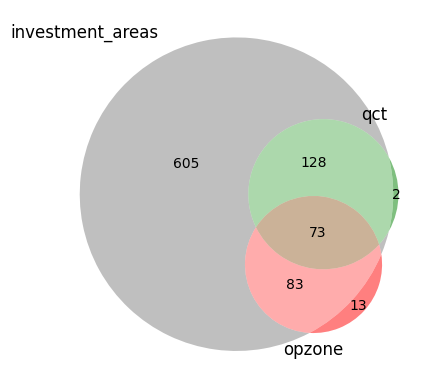

In [ ]:
venn3((setI,setQ,setOP),('investment_areas','qct','opzone'),set_colors=("grey","green","red"),alpha=0.5)
#venn3_circles(subsets=(setI,setQ,setOP),
#              linestyle="dashed", linewidth=2)
plt.show()

Am currently trying to find a map of census tracts to load to be able to visualize data geographically.

Have spent way too long trying to figure this out!  I _think_ the right place to get data is from census.gov.  I found a useful description of geoids here:

https://www.census.gov/programs-surveys/geography/guidance/geo-identifiers.html

and a way to download TIGER files here:

https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.html

and some promising looking tutorials and Q&A here:

https://medium.com/@jl_ruiz/plot-maps-from-the-us-census-bureau-using-geopandas-and-contextily-in-python-df787647ef77

https://stackoverflow.com/questions/76369026/how-to-access-us-census-tiger-shapefiles-in-geopandas

https://www.natekratzer.com/posts/census_map/

So hopefully between those and the example someone else already did for DataKit, I can figure this out!  Still plugging away, though.




In [ ]:
import geopandas as gpd
# input vars
state_id = 78
year = 2020
file_type='bg'

# load TIGER from URI
uri = f"https://www2.census.gov/geo/tiger/TIGER{year}/{file_type.upper()}/tl_{year}_{state_id}_{file_type.lower()}.zip"
#uri = "cb_2023_12_tract_500k.zip"
example_blockgroups = gpd.read_file(uri)

In [ ]:
import folium, matplotlib
import mapclassify
example_blockgroups.explore()


ModuleNotFoundError: No module named 'mapclassify'